***Задание 26. Решить краевую задачу для линейного дифференциального уравнения второго порядка. Использовать метод стрельбы. Полученные численные решения сравнить с аналитическим решением. Определить погрешность решения.***

In [ ]:
import math
import matplotlib.pyplot as plt
from copy import deepcopy
from common import rk4_38, rk_explicit_step, solve_ode

def diff_eq_system(x, Y):
    """
    y'' - (x + 1) y' - 2(x - 1) y = 0 <br>
    Y[0] = y <br>
    Y[1] = y' <br>
    Y[0]' = Y[1] <br>
    Y[1]' = ((x + 1) * Y[1] + 2 * (x - 1) * Y[0]) / x
    """
    if x == 0:
        raise ValueError("Уравнение не определено при x = 0")
    return [Y[1], ((x + 1) * Y[1] + 2 * (x - 1) * Y[0]) / x]

def analytical_solution(x):
    return math.exp(2 * x) + (3 * x + 1) * math.exp(-x)

def shooting(x0, x1, y0, y1_target, h, than_a_min, than_a_max, max_iter=50, eps=1e-8, scheme=rk4_38):
    def shoot(tan_a):
        xs, ys, _ = solve_ode(lambda x, Y: diff_eq_system(x, Y), x0, x1, [y0, tan_a], h, rk_explicit_step, scheme)
        return ys[-1][0], xs, ys

    f_min_y, _, _ = shoot(than_a_min)
    f_max_y, _, _ = shoot(than_a_max)
    f_min = f_min_y - y1_target
    f_max = f_max_y - y1_target

    if f_min * f_max > 0:
        raise ValueError(f"Дихотомия неприменима: F(alpha_min)={f_min:.6e}, F(alpha_max)={f_max:.6e}")

    alphas = [than_a_min, than_a_max]
    errors = [f_min, f_max]
    than_mid = None
    f_mid = None

    for it in range(max_iter):
        than_mid = math.tan(0.5 * (math.atan(than_a_min) + math.atan(than_a_max)))
        y_mid, xs_mid, ys_mid = shoot(than_mid)
        f_mid = y_mid - y1_target
        alphas.append(than_mid)
        errors.append(f_mid)

        if abs(f_mid) < eps:
            break

        if f_min * f_mid <= 0:
            than_a_max = than_mid
            f_max = f_mid
        else:
            than_a_min = than_mid
            f_min = f_mid

    # окончательный полный прогон с найденным alpha_mid
    final_yb, x_grid, y_sol = shoot(than_mid)
    x_grid = x_grid
    y_values = [Y[0] for Y in y_sol]

    return than_mid, x_grid, y_values, alphas, errors

x0, x1 = 0.25, 2.0
y0, y1 = 3.011, 55.545
h = 0.125
than_a1 = -5
than_a2 = 10

alpha_opt, x_opt, y_opt, alphas, errors = shooting(x0, x1, y0, y1, h, than_a1, than_a2)

alpha_opt = 4.270881708802475
y(2) = 55.54499999851417 target: 55.545 error: 1.4858301256026607e-09



Оптимальное значение tan(α)/α/: 4.270882/76.821953°/1.340796 rad
Значение y(2) при оптимальном α: 55.545000
Точное значение y(2): 55.545
Погрешность в конечной точке: 1.485830e-09
Максимальная ошибка по всему интервалу = 6.697032e-04


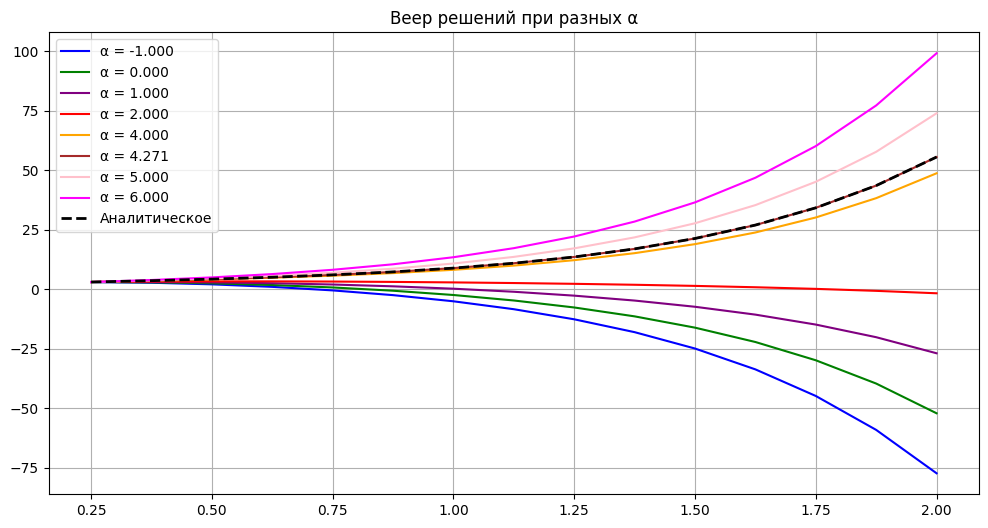

In [32]:
y_analytic = [analytical_solution(x) for x in x_opt]
abs_error = [abs(num - ana) for num, ana in zip(y_opt, y_analytic)]
max_err = max(abs_error)

print("\n" + "=" * 55)
print(f"Оптимальное значение tan(α)/α/: {alpha_opt:.6f}/{math.atan(alpha_opt)*180/math.pi:.6f}°/{math.atan(alpha_opt):.6f} rad")
print(f"Значение y(2) при оптимальном α: {y_opt[-1]:.6f}")
print(f"Точное значение y(2): {y1}")
print(f"Погрешность в конечной точке: {abs(y_opt[-1] - y1):.6e}")
print(f"Максимальная ошибка по всему интервалу = {max_err:.6e}")
print("=" * 55)



# ВЕЕР РЕШЕНИЙ
plt.figure(figsize=(12, 6))

alpha_fan = [-1, 0, 1, 2, 4, alpha_opt, 5, 6,]
colors = ['blue', 'green', 'purple', 'red', 'orange', 'brown', 'pink', 'magenta']

for i, alpha in enumerate(alpha_fan):
    xs, ys, _ = solve_ode(lambda x, Y: diff_eq_system(x, Y), x0, x1, [y0, alpha], h, rk_explicit_step, rk4_38)
    vals = [z[0] for z in ys]
    plt.plot(xs, vals, color=colors[i % len(colors)], label=f"α = {alpha:.3f}")

plt.plot(x_opt, y_analytic, 'k--', linewidth=2, label="Аналитическое")
plt.title("Веер решений при разных α")
plt.legend()
plt.grid()

plt.show()
